In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Membuat data produk acak
np.random.seed(0)
data = {'Produk': ['Produk_' + str(i) for i in range(1, 101)],
        'Berat': np.random.normal(loc=50, scale=5, size=100),  # asumsi berat rata-rata 50 dengan std deviasi 5
        'Harga': np.random.uniform(low=10000, high=20000, size=100)}  # harga antara 10.000 dan 20.000
df = pd.DataFrame(data)

# Menampilkan 5 data pertama
print(df.head())

     Produk      Berat         Harga
0  Produk_1  58.820262  14238.550486
1  Produk_2  52.000786  16063.932141
2  Produk_3  54.893690  10191.931983
3  Produk_4  61.204466  13015.748167
4  Produk_5  59.337790  16601.735375


In [3]:
# Analisis Statistik Proses Kontrol
# Menggunakan Control Chart (Peta Kendali)
mean_berat = df['Berat'].mean()
std_berat = df['Berat'].std()
UCL = mean_berat + 3*std_berat  # Upper Control Limit
LCL = mean_berat - 3*std_berat  # Lower Control Limit

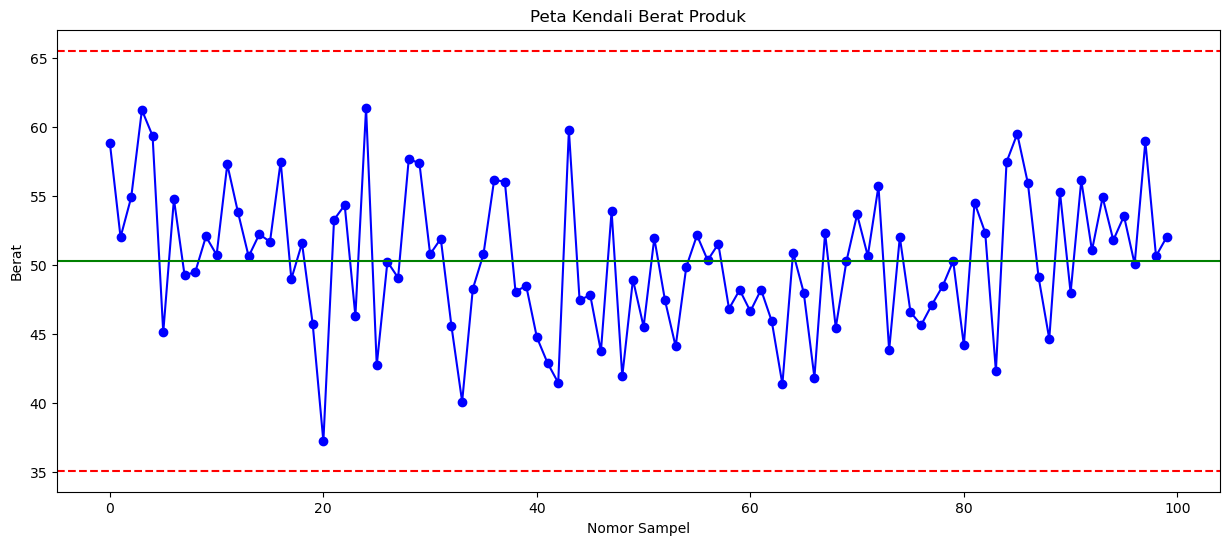

In [4]:
# Membuat peta kendali
plt.figure(figsize=(15, 6))
plt.plot(df['Berat'], linestyle='-', marker='o', color='blue')
plt.axhline(y=mean_berat, color='green', linestyle='-')
plt.axhline(y=UCL, color='red', linestyle='--')
plt.axhline(y=LCL, color='red', linestyle='--')
plt.title('Peta Kendali Berat Produk')
plt.xlabel('Nomor Sampel')
plt.ylabel('Berat')
plt.show()

In [6]:
# Asumsikan USL dan LSL diberikan
USL = 60  # Upper Specification Limit
LSL = 40  # Lower Specification Limit

# Menghitung Cpk
Cpk_upper = (USL - mean_berat) / (3 * std_berat)
Cpk_lower = (mean_berat - LSL) / (3 * std_berat)
Cpk = min(Cpk_upper, Cpk_lower)
Cpk

0.6384564136792265

In [8]:
# Menghitung Ppk
sigma_within = df['Berat'].std()  # Standar deviasi dalam grup
sigma_overall = df['Berat'].std(ddof=0)  # Standar deviasi keseluruhan
Ppk_upper = (USL - mean_berat) / (3 * np.sqrt(sigma_within**2 + sigma_overall**2))
Ppk_lower = (mean_berat - LSL) / (3 * np.sqrt(sigma_within**2 + sigma_overall**2))
Ppk = min(Ppk_upper, Ppk_lower)

print(f'Ppk: {Ppk}')

Ppk: 0.4525897518742306
